# Problem Statement

# Data:

Realtime dataset from the J Meter Files for Company_XYZ

# Features:

Data dictionary:

- **timeStamp**:
  - **Type**: Integer
  - **Description**: The time at which the sample was taken, usually represented in milliseconds since midnight,      January 1, 1970 UTC.

- **elapsed**:
  - **Type**: Integer
  - **Description**: The amount of time, in milliseconds, that the request took to complete.

- **label**:
  - **Type**: String
  - **Description**: The label of the sample, typically the name of the HTTP request in a JMeter test plan.

- **responseCode**:
  - **Type**: String
  - **Description**: The HTTP response code returned by the server.

- **responseMessage**:
  - **Type**: String
  - **Description**: The HTTP response message returned by the server.

- **threadName**:
  - **Type**: String
  - **Description**: The name of the thread group that the sample was part of, often including the thread number and the total number of threads.

- **dataType**:
  - **Type**: String
  - **Description**: The type of data returned by the server, typically ‘text’.

- **success**:
  - **Type**: String (Boolean)
  - **Description**: Indicates whether the request was successful or not. Usually ‘true’ if the response code was in the range 200-399, and ‘false’ otherwise.

- **failureMessage**:
  - **Type**: String
  - **Description**: If the request was not successful, this column may contain a message indicating why the request failed.

- **bytes**:
  - **Type**: Integer
  - **Description**: The number of bytes in the response data.

- **sentBytes**:
  - **Type**: Integer
  - **Description**: The number of bytes sent to the server.

- **grpThreads**:
  - **Type**: Integer
  - **Description**: The total number of active threads in the thread group at the time of the sample.

- **allThreads**:
  - **Type**: Integer
  - **Description**: The total number of active threads in all thread groups at the time of the sample.

- **URL**:
  - **Type**: String
  - **Description**: The URL of the request.

- **Latency**:
  - **Type**: Integer
  - **Description**: The time, in milliseconds, from when the request was sent until the first byte of the response was received.

- **IdleTime**:
  - **Type**: Integer
  - **Description**: The time, in milliseconds, that the thread was idle before starting the sample.

- **Connect**:
  - **Type**: Integer
  - **Description**: The time, in milliseconds, it took to establish the connection.

# Evaluation:

> Only applicable on machine learning model, no model is fitted to the data in this notebook.

# Executive Summary:

* The dataframe has 12587 rows and 16 columns.
* `35.6%` of requests had `502` bad response
* `64.4%` of requests had `200` good response
* The data covers `2023-10-16` up to `2023-10-17`
* `98.9%` of the data covers `2023-10-26`
* `1.1%` of the data covers `2023-10-27`
* `2023-10-26` has 7967 `200` good responseCode, and 4484 bad responseCode`502` 
* `2023-10-27` has 135 `200` good responseCode, abd 0 bad responseCode `502`


# Imports:

In [1]:
# Data handling:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import datetime
from pandas.plotting import lag_plot, autocorrelation_plot
import matplotlib.dates as mdates
import statsmodels.api as sm
from pprint import pprint
import warnings as warn
warn.filterwarnings('ignore')
from itertools import combinations
from scipy.stats import chi2_contingency

# Settings:

In [2]:
SEABORN_STYLE = 'whitegrid'
plt.style.use('ggplot')

# Part I:


In [3]:
# Get the data ready:

df = pd.read_csv("parallel.csv")
df = df.drop('URL', axis=1)
df.head().T

,0,1,2,3,4
timeStamp,1698336651062,1698336704951,1698336651062,1698336686901,1698336656908
elapsed,242182,253582,322676,306526,339518
label,Send HTTP Request 1,Fetch HTTP Request 10,Fetch HTTP Request 1,Send HTTP Request 7,Send HTTP Request 2
responseCode,200,502,200,200,200
responseMessage,OK,Bad Gateway,OK,OK,OK
threadName,Thread Group 1-1,Thread Group 2-10,Thread Group 2-1,Thread Group 1-7,Thread Group 1-2
dataType,text,text,text,text,text
success,True,False,True,True,True
failureMessage,NaN,NaN,NaN,NaN,NaN
bytes,534,7167,5088,534,534


# Exploratory Data Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12586 entries, 0 to 12585
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timeStamp        12586 non-null  int64  
 1   elapsed          12586 non-null  int64  
 2   label            12586 non-null  object 
 3   responseCode     12586 non-null  int64  
 4   responseMessage  12586 non-null  object 
 5   threadName       12586 non-null  object 
 6   dataType         12586 non-null  object 
 7   success          12586 non-null  bool   
 8   failureMessage   0 non-null      float64
 9   bytes            12586 non-null  int64  
 10  sentBytes        12586 non-null  int64  
 11  grpThreads       12586 non-null  int64  
 12  allThreads       12586 non-null  int64  
 13  Latency          12586 non-null  int64  
 14  IdleTime         12586 non-null  int64  
 15  Connect          12586 non-null  int64  
dtypes: bool(1), float64(1), int64(10), object(4)
memory usage:

In [5]:
df.describe()

,timeStamp,elapsed,responseCode,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
count,1.258600e+04,1.258600e+04,12586.000000,0.0,12586.000000,12586.000000,12586.000000,12586.000000,1.258600e+04,12586.0,12586.000000
mean,1.698347e+12,2.093032e+06,307.593199,NaN,1961.690370,1136.812013,89.520658,736.150326,2.093031e+06,0.0,56.052121
std,8.310358e+06,2.108199e+06,144.632333,NaN,3664.273526,86.425357,25.816105,291.149402,2.108199e+06,0.0,165.127916
min,1.698337e+12,8.000000e+00,200.000000,NaN,137.000000,1050.000000,1.000000,1.000000,8.000000e+00,0.0,7.000000
25%,1.698342e+12,3.612500e+02,200.000000,NaN,137.000000,1052.000000,100.000000,634.000000,3.612500e+02,0.0,9.000000
50%,1.698343e+12,8.872505e+05,200.000000,NaN,534.000000,1052.000000,100.000000,800.000000,8.872500e+05,0.0,10.000000
75%,1.698354e+12,4.256900e+06,502.000000,NaN,2682.000000,1225.000000,100.000000,1000.000000,4.256900e+06,0.0,14.000000
max,1.698365e+12,5.969399e+06,502.000000,NaN,20311.000000,1227.000000,100.000000,1000.000000,5.969399e+06,0.0,1165.000000


In [6]:
df.head().T

,0,1,2,3,4
timeStamp,1698336651062,1698336704951,1698336651062,1698336686901,1698336656908
elapsed,242182,253582,322676,306526,339518
label,Send HTTP Request 1,Fetch HTTP Request 10,Fetch HTTP Request 1,Send HTTP Request 7,Send HTTP Request 2
responseCode,200,502,200,200,200
responseMessage,OK,Bad Gateway,OK,OK,OK
threadName,Thread Group 1-1,Thread Group 2-10,Thread Group 2-1,Thread Group 1-7,Thread Group 1-2
dataType,text,text,text,text,text
success,True,False,True,True,True
failureMessage,NaN,NaN,NaN,NaN,NaN
bytes,534,7167,5088,534,534


# 1.1 Basic Statistics:

In [7]:
def calculate_column_statistics(df, exclude_columns=None):
    """
    Calculate min, max, average, mean, median, and range for selected columns in a DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame for which to calculate statistics.
    exclude_columns (list of str, optional): A list of column names to exclude from calculations.

    Returns:
    dict: A dictionary containing statistics for each included column.
    """
    statistics = {}

    if exclude_columns is None:
        exclude_columns = []

    included_columns = [col for col in df.columns if col not in exclude_columns]

    for column in included_columns:
        column_data = df[column]
        statistics[column] = {
            'Min': column_data.min(),
            'Max': column_data.max(),
            'Average': column_data.mean(),
            'Mean': column_data.mean(),
            'Median': column_data.median(),
            'Range': column_data.max() - column_data.min()
        }

    return statistics

In [8]:
exclude_columns = ["label", "responseCode", "responseMessage", "threadName", "dataType", "success", "failureMessage", "URL"]
statistics = calculate_column_statistics(df, exclude_columns=exclude_columns)
pprint(statistics)

{'Connect': {'Average': 56.05212140473542,
             'Max': 1165,
             'Mean': 56.05212140473542,
             'Median': 10.0,
             'Min': 7,
             'Range': 1158},
 'IdleTime': {'Average': 0.0,
              'Max': 0,
              'Mean': 0.0,
              'Median': 0.0,
              'Min': 0,
              'Range': 0},
 'Latency': {'Average': 2093030.534562212,
             'Max': 5969399,
             'Mean': 2093030.534562212,
             'Median': 887250.0,
             'Min': 8,
             'Range': 5969391},
 'allThreads': {'Average': 736.1503257587796,
                'Max': 1000,
                'Mean': 736.1503257587796,
                'Median': 800.0,
                'Min': 1,
                'Range': 999},
 'bytes': {'Average': 1961.6903702526618,
           'Max': 20311,
           'Mean': 1961.6903702526618,
           'Median': 534.0,
           'Min': 137,
           'Range': 20174},
 'elapsed': {'Average': 2093031.8132051486,
            

# 1.2 Pearson Correlation Coefficient:

`Pearson Correlation Coefficient` 

> quantifies the strength and direction of the linear relationship between two continous variables.

* -1 indicates a perfect negative linear correlation (as one variable increases, the other decreases)
* 0 indicates no linear correlation (variables not related in linear way)
* 1 indicates a perfect positive linear relationship (as one variable increases, the other also increases)
* The closer the value of "r" is to 1 or -1, the stromnger the relationship. 
* 0 Suggests a weak or no linear relationship.

In [9]:
def top_pearson_correlations(df, n=10, exclude_columns=None):
    """
    Find the top n highest Pearson correlation values in a DataFrame, excluding specified columns.
    
    Parameters:
    - df: The DataFrame containing the data.
    - n: Number of top correlations to return (default is 10).
    - exclude_columns: List of column names to exclude from correlation calculations (default is None).
    
    Returns:
    - A DataFrame with the top n correlations, sorted by absolute value, including a description.
    """
    if exclude_columns is None:
        exclude_columns = []
    
    columns_to_correlate = [col for col in df.columns if col not in exclude_columns]
    
    correlations = []
    
    for col1 in columns_to_correlate:
        for col2 in columns_to_correlate:
            if col1 != col2:
                correlation = df[col1].corr(df[col2])
                description = ''
                
                if correlation == -1:
                    description = 'Perfect negative linear correlation, as one variable increases, the other also increases'
                elif correlation == 0:
                    description = 'No linear correlation, variables not related in linear way'
                elif correlation == 1:
                    description = 'Perfect positive linear relationship'
                elif abs(correlation) > 0.7:
                    description = 'Strong linear relationship'
                elif abs(correlation) > 0.3:
                    description = 'Moderate linear relationship'
                else:
                    description = 'Weak or no linear relationship'
                
                correlations.append((col1, col2, correlation, description))
    
    df_correlations = pd.DataFrame(correlations, columns=['Column1', 'Column2', 'Correlation', 'Description'])
    df_correlations = df_correlations.reindex(df_correlations['Correlation'].abs().sort_values(ascending=False).index)
    
    return df_correlations.head(n)

In [10]:
excluded_columns = ["label", "responseCode", "responseMessage", "threadName", "dataType", "success", "failureMessage", "URL"]
top_correlations = top_pearson_correlations(df, n=20, exclude_columns=excluded_columns)
print(top_correlations)

       Column1     Column2  Correlation                     Description
13     elapsed     Latency     1.000000      Strong linear relationship
49     Latency     elapsed     1.000000      Strong linear relationship
45  allThreads     Latency     0.543545    Moderate linear relationship
53     Latency  allThreads     0.543545    Moderate linear relationship
41  allThreads     elapsed     0.543545    Moderate linear relationship
12     elapsed  allThreads     0.543545    Moderate linear relationship
48     Latency   timeStamp     0.505811    Moderate linear relationship
5    timeStamp     Latency     0.505811    Moderate linear relationship
8      elapsed   timeStamp     0.505810    Moderate linear relationship
0    timeStamp     elapsed     0.505810    Moderate linear relationship
44  allThreads  grpThreads     0.437165    Moderate linear relationship
36  grpThreads  allThreads     0.437165    Moderate linear relationship
4    timeStamp  allThreads     0.430444    Moderate linear relat

# 1.3 Timestamp (UNIX)

* `Unix Timestamp`: Unix time is currently defined as the number of non-leap seconds which have passed since 00:00:00 UTC on Thursday, 1 January 1970 (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjx8JW-1_KBAxV2WEEAHeuqDIgQFnoECB8QAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnix_time&usg=AOvVaw1t9AaEES4ltd1u7dcSifgN&opi=89978449)

* Unix Timestamp Converter: --> https://www.unixtimestamp.com/

In [11]:
# Convert the UNIX Timestamp to human readable date and add it to the dataframe:
df['Date'] = pd.to_datetime(df['timeStamp'], unit='ms')

# Display the modified DataFrame
df.head().T

,0,1,2,3,4
timeStamp,1698336651062,1698336704951,1698336651062,1698336686901,1698336656908
elapsed,242182,253582,322676,306526,339518
label,Send HTTP Request 1,Fetch HTTP Request 10,Fetch HTTP Request 1,Send HTTP Request 7,Send HTTP Request 2
responseCode,200,502,200,200,200
responseMessage,OK,Bad Gateway,OK,OK,OK
threadName,Thread Group 1-1,Thread Group 2-10,Thread Group 2-1,Thread Group 1-7,Thread Group 1-2
dataType,text,text,text,text,text
success,True,False,True,True,True
failureMessage,NaN,NaN,NaN,NaN,NaN
bytes,534,7167,5088,534,534


# 1.5 Response Code Distribution:

In [28]:
# View the response code values:
df['responseCode'].unique()

array(['200', '502'], dtype=object)

In [29]:
# View the response code value distribution:
df['responseCode'].value_counts()

responseCode
200    8102
502    4484
Name: count, dtype: int64

In [14]:
response_counts = df['responseCode'].value_counts()

count_200 = response_counts.get(200, 0)
count_502 = response_counts.get(502, 0)

print(f"Observation: There are {count_200} occurrences of response code 200 and {count_502} occurrences of response code 502.")

Observation: There are 8102 occurrences of response code 200 and 4484 occurrences of response code 502.


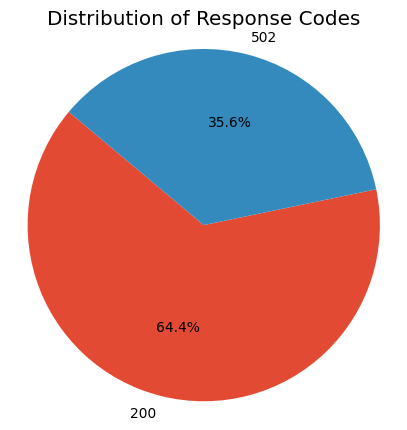

In [15]:
# Visualize total response codes:

# Calculate value counts for 'responseCode':
value_counts_response_code = df['responseCode'].value_counts()

# Create a pie chart:
plt.figure(figsize=(5, 5))
plt.pie(value_counts_response_code, labels=value_counts_response_code.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response Codes')
plt.axis('equal')  
plt.show()

# 1.6 Date:

In [16]:
# What Date range does the dataset cover?:

# Convert 'Date' column to date-only format
df['Date'] = df['Date'].dt.date

# Count occurrences per date
date_counts = df['Date'].value_counts()

# Display the count of occurrences per date
print(date_counts)


Date
2023-10-26    12451
2023-10-27      135
Name: count, dtype: int64


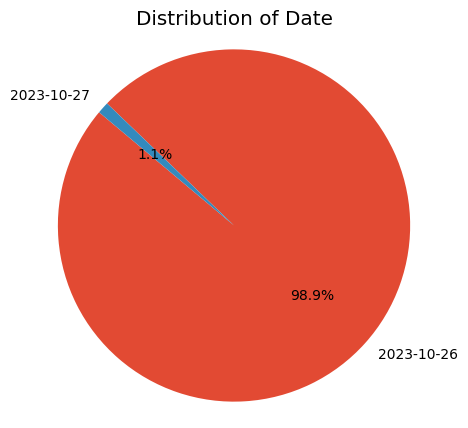

In [17]:
# Visualize the distribution of Date:

# Calculate value counts for 'responseCode':
value_counts_response_code = df['Date'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts_response_code, labels=value_counts_response_code.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Date')
plt.axis('equal')  
plt.show()

# 1.7 Response Codes:

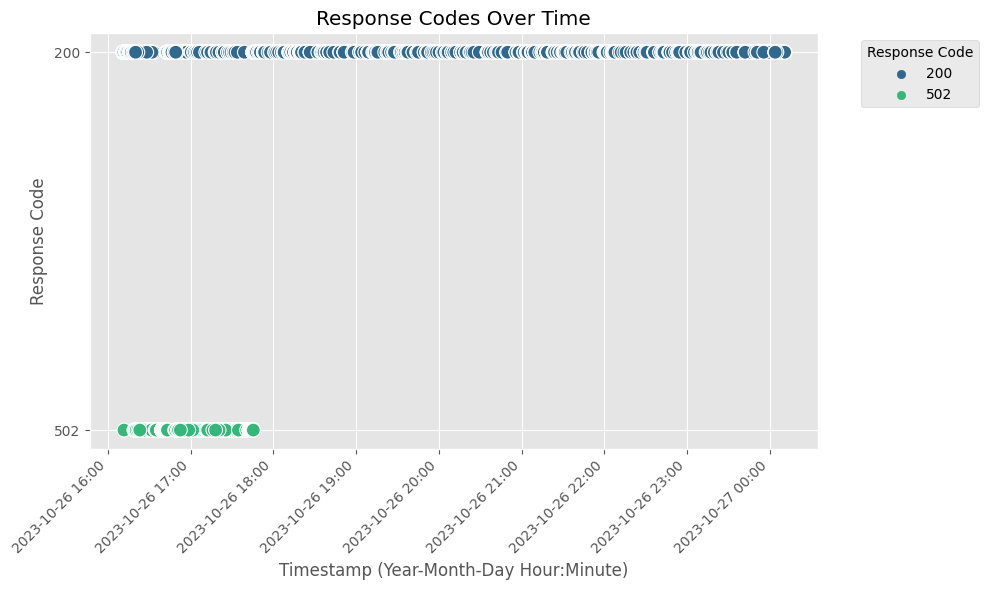

In [22]:
# Response Codes over Time, a visualization:

# Convert timeStamp to datetime for better x-axis formatting:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')

# Convert responseCode to string to treat it as a categorical variable:
df['responseCode'] = df['responseCode'].astype(str)

# Create the scatterplot:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='timeStamp', y='responseCode', hue='responseCode', palette='viridis', marker='o', s=100, edgecolor='w')

# Format x-axis and make plot:
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Response Codes Over Time')
plt.xlabel('Timestamp (Year-Month-Day Hour:Minute)')
plt.ylabel('Response Code')
plt.legend(title='Response Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 1.8 Latency vs Response Code :

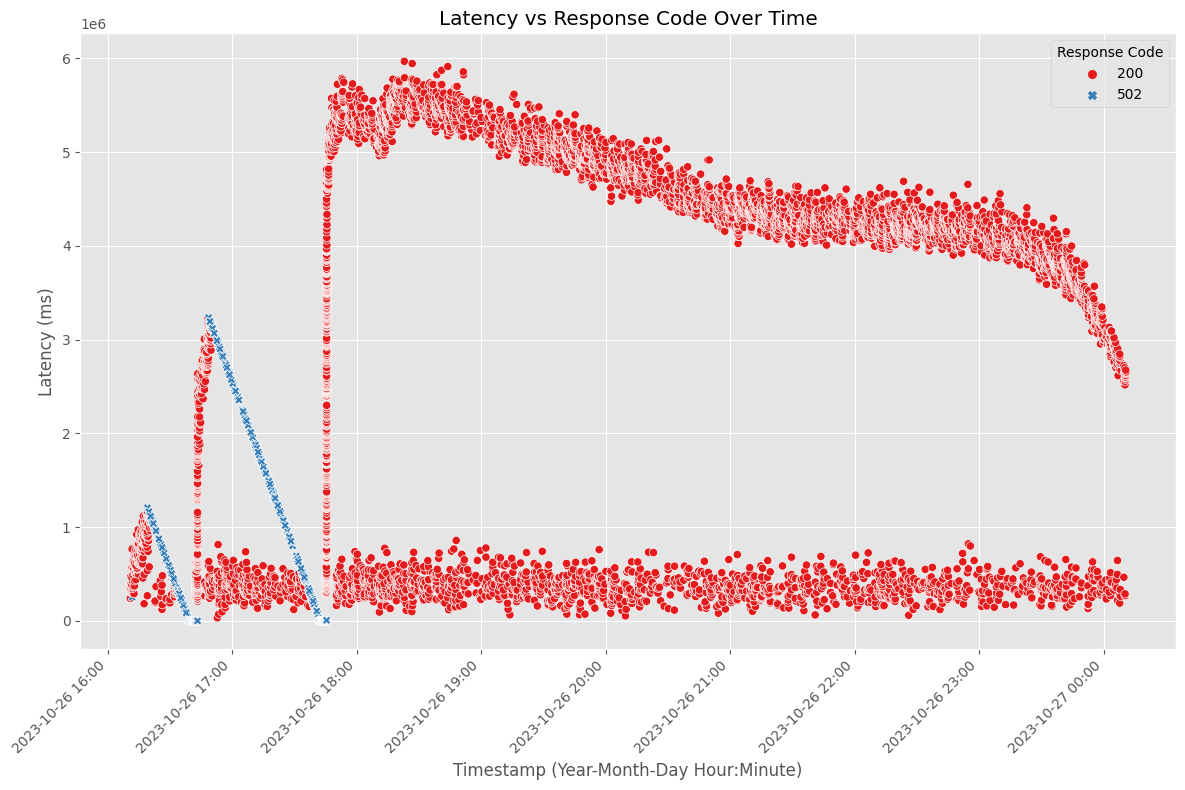

In [20]:
# latency vs responseCode:

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')

# Create the scatter plot
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=df, x='timeStamp', y='Latency', hue='responseCode', style='responseCode', markers=True, palette='Set1')

# Format x-axis
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # Show a tick every 1 hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Show year, month, day, hour, and minute

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Labels, title, and legend
plt.title('Latency vs Response Code Over Time')
plt.xlabel('Timestamp (Year-Month-Day Hour:Minute)')
plt.ylabel('Latency (ms)')
plt.legend(title='Response Code')

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show();

# 1.9 Latency vs Time:

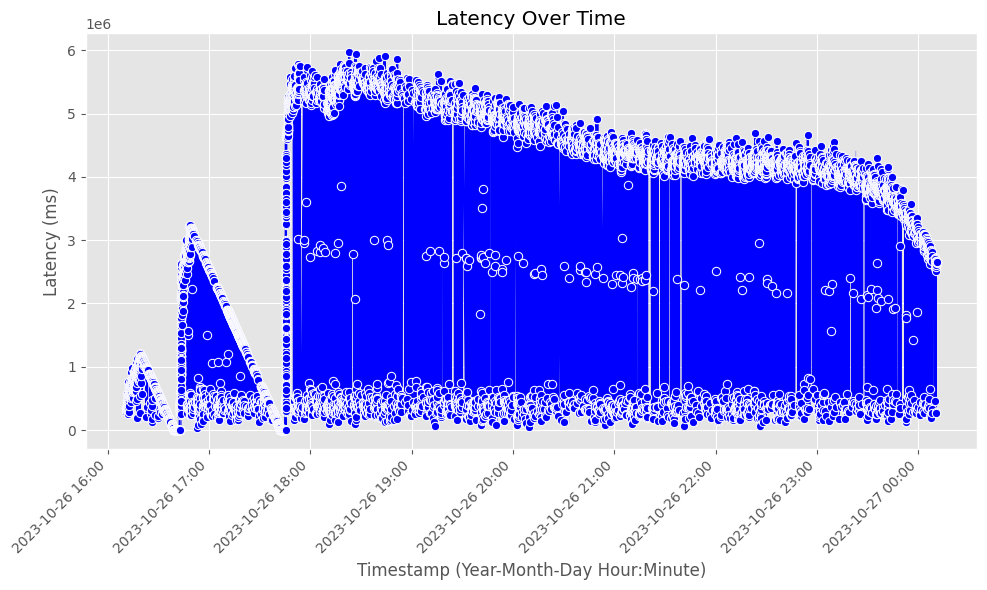

In [26]:
# Convert timeStamp to datetime for better x-axis formatting:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
df['Latency'] = pd.to_numeric(df['Latency'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x='timeStamp', y='Latency', marker='o', markersize=6, linestyle='-', color='b')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # Show a tick every 1 hour
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Show year, month, day, hour, and minute
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Latency Over Time')
plt.xlabel('Timestamp (Year-Month-Day Hour:Minute)')
plt.ylabel('Latency (ms)')
plt.tight_layout()
plt.show()

# 2.0 Latency vs Connect:

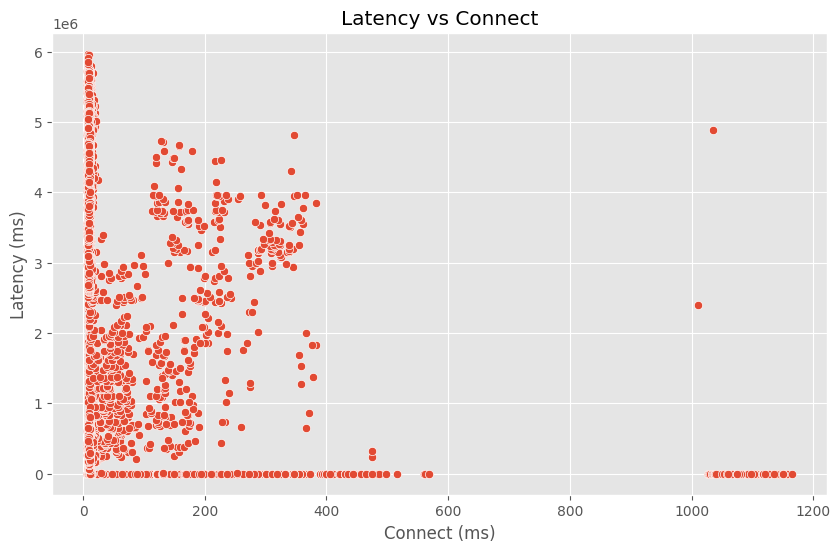

In [24]:
# Latency vs Connect:

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Connect', y='Latency')
plt.title('Latency vs Connect')
plt.xlabel('Connect (ms)')
plt.ylabel('Latency (ms)')
plt.show()

# 2.1 Latency vs Threads:

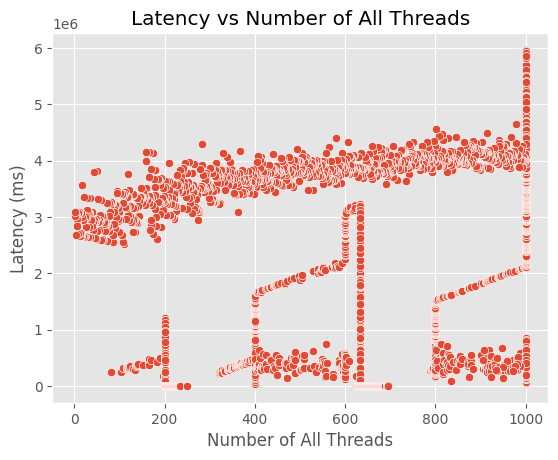

In [27]:
# Labels and title:
ax = sns.scatterplot(data=df, x='allThreads', y='Latency')

plt.title('Latency vs Number of All Threads')
plt.xlabel('Number of All Threads')
plt.ylabel('Latency (ms)')
plt.show()